In [20]:
#Importing required Python packages
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from pprint import pprint
import seaborn as sns
from matplotlib import collections as mc

% matplotlib inline

np.random.seed(sum(map(ord, "asthetics")))
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,5)

In [29]:
X = np.array(range(1,100))
X = X[:, np.newaxis]

# Define y as a function of X and introduce some noise
y = 10 + 2*X.ravel()
y = y + np.random.normal(loc=0, scale=70, size=99)

In [30]:
## Instantiate, fit and predict y~x
lin = LinearRegression()
lin.fit(X,y)
y_pred = lin.predict(X)

In [32]:
pd.DataFrame({
            'X':X.ravel(),
            'y':y,
            'y_pred':y_pred             
             })

,X,y,y_pred
0,1,48.579531,32.650941
1,2,55.213783,34.392251
2,3,159.512968,36.133562
3,4,34.899494,37.874872
4,5,-14.443398,39.616183
5,6,80.666016,41.357494
6,7,-32.396778,43.098804
7,8,163.713439,44.840115
8,9,29.826623,46.581426
9,10,88.577982,48.322736


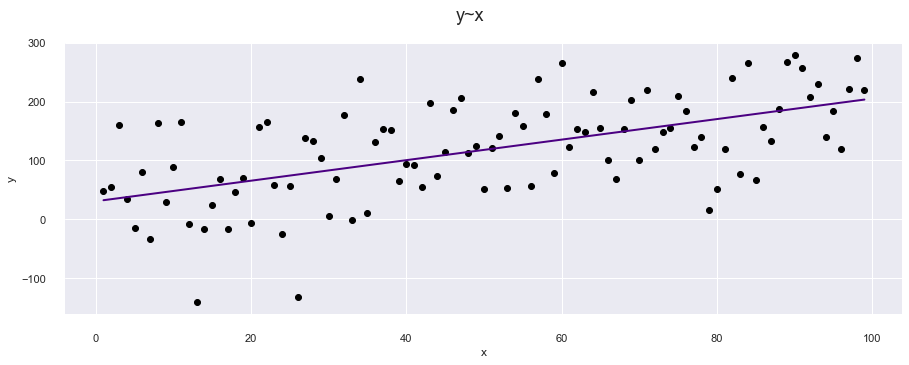

In [36]:
def plotline(x1, y1, x2, y2, c, l):
    plt.scatter(x1,y1, color='black')
    plt.plot(x2, y2, color=c, linewidth=l)
    plt.axis('tight')
    plt.xlabel('x')
    plt.ylabel('y')
    sns.despine(offset=10, trim=True)

plotline(X,y,X,y_pred, 'indigo', 2)
plt.suptitle('y~x', fontsize=18)
plt.show()

### PCA vs Linear Regression

In [38]:
# Combining x and y
Xy = np.array([X.ravel(), y]).T

In [49]:
# Instantiate a PCA model, fun fit_transform to xy followed by inverse tranform
pca=PCA(n_components=1)
xy_pca=pca.fit_transform(Xy)
xy_n=pca.inverse_transform(xy_pca)

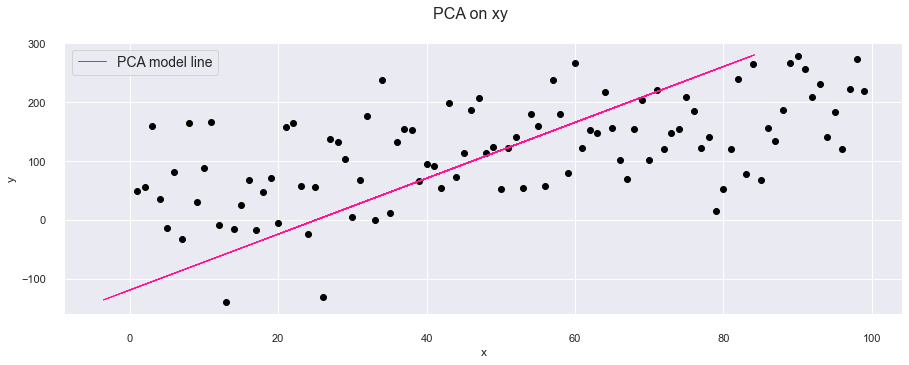

In [51]:
## Plot xy against xy_n. xy=x+y
plotline(x,y,xy_n[:,0], xy_n[:,1], 'deeppink', 1)
plt.suptitle('PCA on xy', fontsize=16)
plt.legend(['PCA model line'], loc='best', fontsize=14)
plt.show()

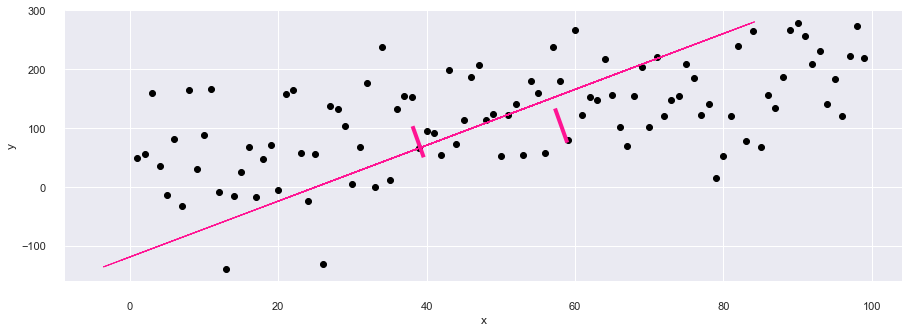

In [52]:
# Replot the PCA line to examine
plotline(x,y,xy_n[:,0], xy_n[:,1], 'deeppink', 1)

# Plot some sample values ot demonstrate
lines = [[(38.1, 102.9), (39.6,50)], [(58.95,75), (57.3, 133)]]
lines = mc.LineCollection(lines, colors='deeppink', linewidths=4)
plt.gca().add_collection(lines)

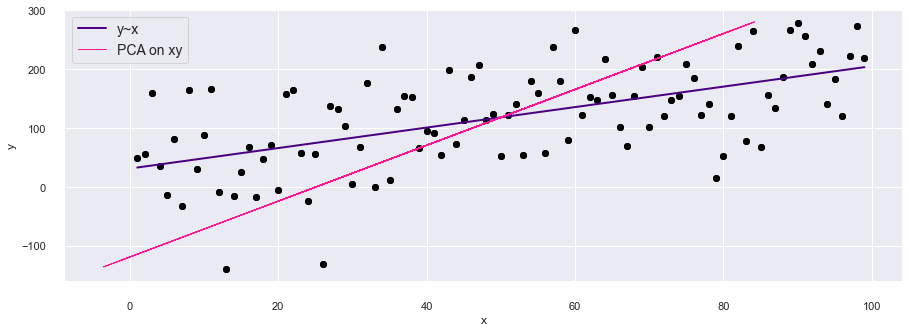

In [54]:
# Putting it together
plotline(X,y,X,y_pred, 'indigo', 2)
plotline(x,y,xy_n[:,0],xy_n[:,1],'deeppink',1)
plt.legend(['y~x', 'PCA on xy'], loc='best', fontsize=14)
plt.show()